In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [60]:
customers = pd.read_csv('./marketing_campaign.csv', sep='\t')
customers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [61]:
customers.drop('ID', axis=1, inplace=True)
rows, cols = customers.shape
print('Rows: ', rows)
print('Cols: ', cols)

Rows:  2240
Cols:  28


In [62]:
customers.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [63]:
import datetime

currentYear = datetime.datetime.now().year

customers = customers.rename(columns={'Year_Birth': 'Age'})
customers['Age'] = customers['Age'].map(lambda year_Birth: currentYear-year_Birth)
customers.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,65,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,68,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,38,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [64]:
customers['Dt_Customer'] = pd.to_datetime(customers['Dt_Customer'], format='%d-%m-%Y')
customers['Years_As_Customer'] = customers['Dt_Customer'].map(lambda dt_customer: currentYear-dt_customer.year)
customers.head()

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_As_Customer
0,65,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,10
1,68,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,8
2,57,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,9
3,38,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,8
4,41,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,8


In [65]:
educationLevels = customers['Education'].unique().tolist()
educationLevels.sort()

print('Education_level')
for level in educationLevels:
  print(educationLevels.index(level), '-', level)

customers = customers.rename(columns={'Education': 'Education_level'})
customers['Education_level'] = customers['Education_level'].map(
  lambda level: educationLevels.index(level)
)
customers.head()

Education_level
0 - 2n Cycle
1 - Basic
2 - Graduation
3 - Master
4 - PhD


,Age,Education_level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_As_Customer
0,65,2,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,10
1,68,2,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,8
2,57,2,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,9
3,38,2,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,8
4,41,4,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,8


In [66]:
print('Marital_Status\tPartner')
for status in customers['Marital_Status'].unique().tolist():
  print( '%10s\t%4d'% (status, 1 if status in ['Married', 'Together'] else 0))

customers = customers.rename(columns={'Marital_Status': 'Partner'})
customers['Partner'] = customers['Partner'].map(
  lambda status: 1 if status in ['Married', 'Together'] else 0
)
customers.head()

Marital_Status	Partner
    Single	   0
  Together	   1
   Married	   1
  Divorced	   0
     Widow	   0
     Alone	   0
    Absurd	   0
      YOLO	   0


,Age,Education_level,Partner,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_As_Customer
0,65,2,0,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,10
1,68,2,0,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,8
2,57,2,1,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,9
3,38,2,1,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,8
4,41,4,1,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,8


In [67]:
customers['Dependents'] = customers['Kidhome'] + customers['Teenhome']
customers.head()

,Age,Education_level,Partner,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_As_Customer,Dependents
0,65,2,0,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,3,11,1,10,0
1,68,2,0,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,3,11,0,8,2
2,57,2,1,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,3,11,0,9,0
3,38,2,1,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,3,11,0,8,1
4,41,4,1,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,3,11,0,8,1


In [68]:
print('Deleted %d rows with null values' % customers.isnull().sum().sum())
customers = customers.dropna()

Deleted 24 rows with null values


In [69]:
customers['TotalMntSpent'] = customers['MntWines'] + customers['MntFruits'] + customers['MntMeatProducts'] + customers['MntFishProducts'] + customers['MntSweetProducts'] + customers['MntGoldProds']

In [70]:
customers['TotalAcceptedCmps'] = customers['AcceptedCmp1'] + customers['AcceptedCmp2'] + customers['AcceptedCmp3'] + customers['AcceptedCmp4'] + customers['AcceptedCmp5'] + customers['Response']

In [71]:
customers['TotalNumPurchases'] = customers['NumWebPurchases'] + customers['NumCatalogPurchases'] + customers['NumStorePurchases'] + customers['NumDealsPurchases']

In [72]:
relevantFeatures = ['Income', 'Dependents', 'Age', 'Years_As_Customer','Partner','Education_level', 'TotalMntSpent', 'TotalAcceptedCmps', 'TotalNumPurchases']

In [73]:
import numpy as np
from scipy import stats

# select only the relevant features
df = customers[relevantFeatures]
# remove outliers
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
rows, cols = df.shape
print('Rows: ', rows)
print('Cols: ', cols)

Rows:  2154
Cols:  9


1 888155035839.4133
2 248535617714.07272
3 127182240785.2936
4 75364531103.15106
5 49797832021.19399
6 37131326316.51643
7 28853147576.64676
8 22449032038.240406
9 17880423184.46038
10 14545287798.980217


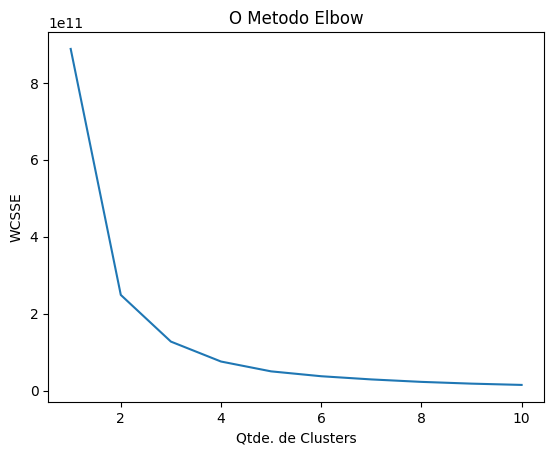

In [74]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(df)
  print (i,kmeans.inertia_)
  wcsse.append(kmeans.inertia_)

plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde. de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [75]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(df)

KMeans(init='random', n_clusters=4)

In [76]:
print('Groups:  ', len(kmeans.cluster_centers_.tolist()))
print('Columns: ', len(kmeans.cluster_centers_.tolist()[0]))

Groups:   4
Columns:  9


In [78]:
groups = pd.Series(kmeans.labels_).unique().tolist()
groups

[1, 0, 3, 2]

In [80]:
print("Index\tColumn")
for i in range(len(df.columns)):
  print('#', i, '\t', df.columns.tolist()[i])

Index	Column
# 0 	 Income
# 1 	 Dependents
# 2 	 Age
# 3 	 Years_As_Customer
# 4 	 Partner
# 5 	 Education_level
# 6 	 TotalMntSpent
# 7 	 TotalAcceptedCmps
# 8 	 TotalNumPurchases


In [81]:
df = df.reset_index(drop=True)
labels = kmeans.labels_

In [82]:
def plotGroups(col_x, col_y):
  for group in groups:
    plt.scatter(
      df[pd.Series(labels) == group].values[:, col_x],
      df[pd.Series(labels) == group].values[:, col_y],
      label=("Group " + str(group))
    )

  plt.scatter(
    kmeans.cluster_centers_[:, col_x],   
    kmeans.cluster_centers_[:, col_y], 
    c = 'purple',
    label="Centroid"
  )

  plt.legend()
  plt.title('Customer Clusters and Centroids')
  plt.xlabel(df.columns.tolist()[col_x])
  plt.ylabel(df.columns.tolist()[col_y])
  plt.show()

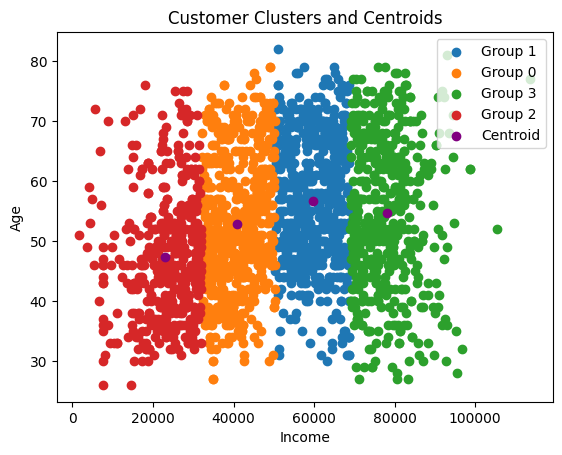

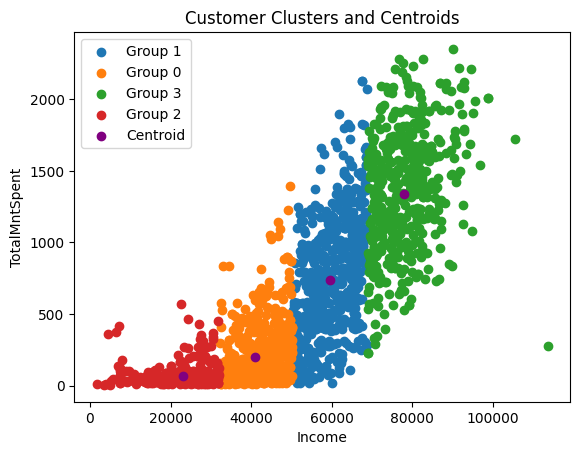

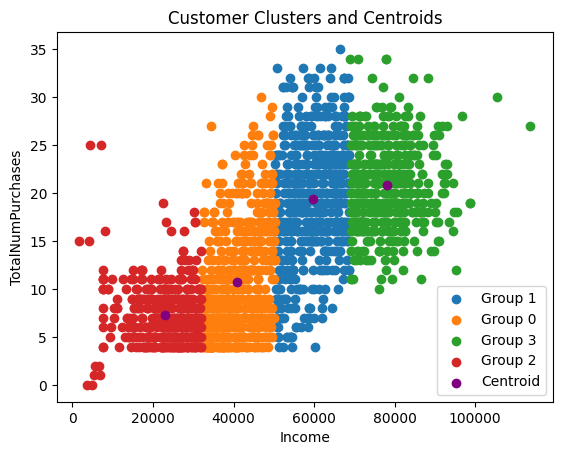

In [88]:
plotGroups(
  0, # Income
  2  # Age
)

plotGroups(
  0, # Income
  6  # TotalMntSpent
)

plotGroups(
  0, # Income
  8  # TotalNumPurchases
)

In [89]:
clustered_df = df
clustered_df['group'] = labels
clustered_df.head()

,Income,Dependents,Age,Years_As_Customer,Partner,Education_level,TotalMntSpent,TotalAcceptedCmps,TotalNumPurchases,group
0,58138.0,0,65,10,0,2,1617,1,25,1
1,46344.0,2,68,8,0,2,27,0,6,0
2,71613.0,0,57,9,1,2,776,0,21,3
3,26646.0,1,38,8,1,2,53,0,8,2
4,58293.0,1,41,8,1,4,422,0,19,1


In [94]:
description = clustered_df.groupby("group")[relevantFeatures]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,Income,Dependents,Age,Years_As_Customer,Partner,Education_level,TotalMntSpent,TotalAcceptedCmps,TotalNumPurchases,n_clients
group,,,,,,,,,,
0,40952.636218,1.330128,52.809295,8.934295,0.631410,2.516026,202.230769,0.251603,10.756410,624
1,59671.372483,1.050336,56.607383,9.026846,0.664430,2.568792,736.914430,0.300336,19.382550,596
2,23102.990971,0.988713,47.372460,9.013544,0.647856,1.927765,69.494357,0.176072,7.237020,443
3,78069.000000,0.378819,54.613035,8.926680,0.639511,2.437882,1336.403259,0.778004,20.847251,491
